In [8]:
import pandas as pd

# Path to the prosody.log file
log_file = 'prosody.log'

# Define an empty list to store parsed log data
log_data = []

# Open the log file and read each line
with open(log_file, 'r') as file:
    for line in file:
        # Split each line into fields separated by spaces
        fields = line.strip().split()

        # Extract information from the fields
        timestamp = ' '.join(fields[:3])
        source = fields[3].rstrip(':')
        level = fields[4].rstrip(':')
        message = ' '.join(fields[5:])

        # Append the parsed data to the list
        log_data.append({
            "timestamp": timestamp,
            "thread_context": source,
            "log_level": level,
            "message": message
        })

# Convert the list of parsed log data into a pandas DataFrame
log_df = pd.DataFrame(log_data)

# Display the DataFrame
(log_df.head())


,timestamp,thread_context,log_level,message
0,Apr 22 22:01:24,startup,info,Hello and welcome to Prosody version 0.11.13
1,Apr 22 22:01:24,startup,info,Prosody is using the select backend for connec...
2,Apr 22 22:01:24,localhost:tls,info,Certificates loaded
3,Apr 22 22:01:24,portmanager,info,"Activated service 's2s' on [::]:5269, [*]:5269"
4,Apr 22 22:01:24,portmanager,info,"Activated service 'c2s' on [::]:5222, [*]:5222"


In [9]:
df = log_df

In [10]:
df.sample(20)

,timestamp,thread_context,log_level,message
70,Apr 22 22:01:35,breakout.127.0.0.1:tls,info,Certificates loaded
2,Apr 22 22:01:24,localhost:tls,info,Certificates loaded
81,Apr 22 22:01:35,breakout.127.0.0.1:muc_domain_mapper,info,Loading mod_muc_domain_mapper for host interna...
8,Apr 22 22:01:32,c2s56390e917af0,info,Client connected
25,Apr 22 22:01:35,localhost:tls,info,Certificates loaded
27,Apr 22 22:01:35,avmoderation.127.0.0.1:av_moderation_component,info,Starting av_moderation for conference.127.0.0.1
55,Apr 22 22:01:35,metadata.127.0.0.1:room_metadata_component,info,Hook to muc events on conference.127.0.0.1
90,Apr 22 22:01:39,c2s55b6b7df0790,info,Authenticated as jvb@auth.127.0.0.1
92,Apr 22 22:01:44,c2s55b6b7ca3eb0,info,Client connected
11,Apr 22 22:01:34,startup,info,Shutting down: Received SIGTERM


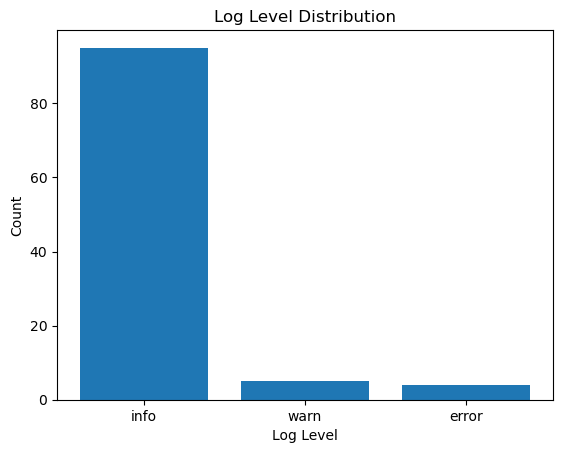

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each log level
log_level_counts = df['log_level'].value_counts()

# Create a bar plot
plt.bar(log_level_counts.index, log_level_counts.values)

# Add labels and title
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.title('Log Level Distribution')

# Show the plot
plt.show()

In [36]:
from analyze_logs import parse_prosody_log

# Path to the prosody.log file
log_file = 'prosody.log'

# Call the function to parse the log file and create the DataFrame
log_df = parse_prosody_log(log_file)

# Display the DataFrame
log_df.head(20)

,timestamp,source,level,message
0,Apr 22 22:01:24,startup,info,Hello and welcome to Prosody version 0.11.13
1,Apr 22 22:01:24,startup,info,Prosody is using the select backend for connec...
2,Apr 22 22:01:24,localhost:tls,info,Certificates loaded
3,Apr 22 22:01:24,portmanager,info,"Activated service 's2s' on [::]:5269, [*]:5269"
4,Apr 22 22:01:24,portmanager,info,"Activated service 'c2s' on [::]:5222, [*]:5222"
5,Apr 22 22:01:24,portmanager,info,Activated service 'legacy_ssl' on no ports
6,Apr 22 22:01:27,c2s56390e98cce0,info,Client connected
7,Apr 22 22:01:27,c2s56390e98cce0,info,Client disconnected: connection closed
8,Apr 22 22:01:32,c2s56390e917af0,info,Client connected
9,Apr 22 22:01:32,c2s56390e917af0,info,Client disconnected: connection closed


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze_logs import parse_prosody_log  # Assuming you have defined parse_prosody_log function in prosody.py

# Path to the prosody.log file
log_file = 'prosody.log'

# Call the function to parse the log file and create the DataFrame
log_df = parse_prosody_log(log_file)

# Convert timestamp column to datetime type
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'])

# Group by timestamp and level, and count occurrences
level_counts = log_df.groupby(['timestamp', 'level']).size().unstack(fill_value=0)

# Plot the line graph
level_counts.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Log Levels Over Time')

# Show the plot
plt.legend(title='Level')
plt.grid(True)
plt.show()


C:\Users\abhis\AppData\Local\Temp\ipykernel_9436\1748027701.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  log_df['timestamp'] = pd.to_datetime(log_df['timestamp'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: Apr 22 22:01:24, at position 0

In [29]:
df['level'].unique()

array(['info', 'warn', 'error'], dtype=object)

In [2]:
from prosody import prosody_log
log_file_path = 'prosody.log'
# Call the function to get the DataFrame
df = prosody_log(log_file_path)

# Display the DataFrame
(df.sample(20))

,timestamp,thread_context,log_level,message
1,Apr 22 22:01:24,startup,info,Prosody is using the select backend for connec...
41,Apr 22 22:01:35,127.0.0.1:muc_breakout_rooms,info,Hook to muc events on conference.127.0.0.1
62,Apr 22 22:01:35,speakerstats.127.0.0.1:speakerstats_component,info,Conference component loaded conference.127.0.0.1
73,Apr 22 22:01:35,breakout.127.0.0.1:muc_domain_mapper,info,Loading mod_muc_domain_mapper for host localhost!
71,Apr 22 22:01:35,breakout.127.0.0.1:muc_domain_mapper,info,Loading mod_muc_domain_mapper for host confere...
5,Apr 22 22:01:24,portmanager,info,Activated service 'legacy_ssl' on no ports
24,Apr 22 22:01:35,conference.127.0.0.1:muc_domain_mapper,info,Loading mod_muc_domain_mapper for host localhost!
12,Apr 22 22:01:34,general,info,Shutting down...
91,Apr 22 22:01:39,auth.127.0.0.1:limits_exception,info,Setting stanza size limits for jvb@auth.127.0....
28,Apr 22 22:01:35,avmoderation.127.0.0.1:av_moderation_component,info,Hook to muc events on conference.127.0.0.1
